In [1]:
from ray.tune.analysis import Analysis
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
analysis = Analysis("/home/sergei/ray_results/adversarial_tune")

In [3]:
target = 'policy_reward_mean/player_1'

In [4]:
df = analysis.dataframe(metric=target, mode='max')

In [5]:
df.iloc[0]

episode_reward_max                                                     6.51936
episode_reward_min                                                    -2.71663
episode_reward_mean                                                    5.77765
episode_len_mean                                                       159.277
episodes_this_iter                                                          47
                                                   ...                        
config/sgd_minibatch_size                                              2095.51
config/train_batch_size                                                6568.03
config/train_policies                                               [player_1]
config/train_steps                                                    99999999
logdir                       /home/sergei/ray_results/adversarial_tune/trai...
Name: 0, Length: 70, dtype: object

In [6]:
df.columns

Index(['episode_reward_max', 'episode_reward_min', 'episode_reward_mean',
       'episode_len_mean', 'episodes_this_iter', 'num_healthy_workers',
       'timesteps_total', 'done', 'episodes_total', 'training_iteration',
       'experiment_id', 'date', 'timestamp', 'time_this_iter_s',
       'time_total_s', 'pid', 'hostname', 'node_ip', 'time_since_restore',
       'timesteps_since_restore', 'iterations_since_restore', 'trial_id',
       'experiment_tag', 'policy_reward_min/player_1',
       'policy_reward_min/player_2', 'policy_reward_max/player_1',
       'policy_reward_max/player_2', 'policy_reward_mean/player_1',
       'policy_reward_mean/player_2', 'hist_stats/episode_reward',
       'hist_stats/episode_lengths', 'hist_stats/policy_player_1_reward',
       'hist_stats/policy_player_2_reward', 'sampler_perf/mean_env_wait_ms',
       'sampler_perf/mean_processing_ms', 'sampler_perf/mean_inference_ms',
       'timers/sample_time_ms', 'timers/sample_throughput',
       'timers/learn_t

In [7]:
for k in df.columns:
#     if k.startswith('episode'):
#         del df[k]
    if not (k.startswith('config') or k == target or k == 'logdir'):
        del df[k]

In [8]:
df = df.sort_values(target, ascending=False)

(array([131.,  44.,   5.,   2.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-10.        ,  -8.80392157,  -7.60784314,  -6.41176471,
         -5.21568627,  -4.01960784,  -2.82352941,  -1.62745098,
         -0.43137255,   0.76470588,   1.96078431]),
 <a list of 10 Patch objects>)

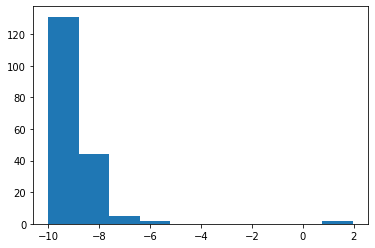

In [9]:
plt.hist(df[target])

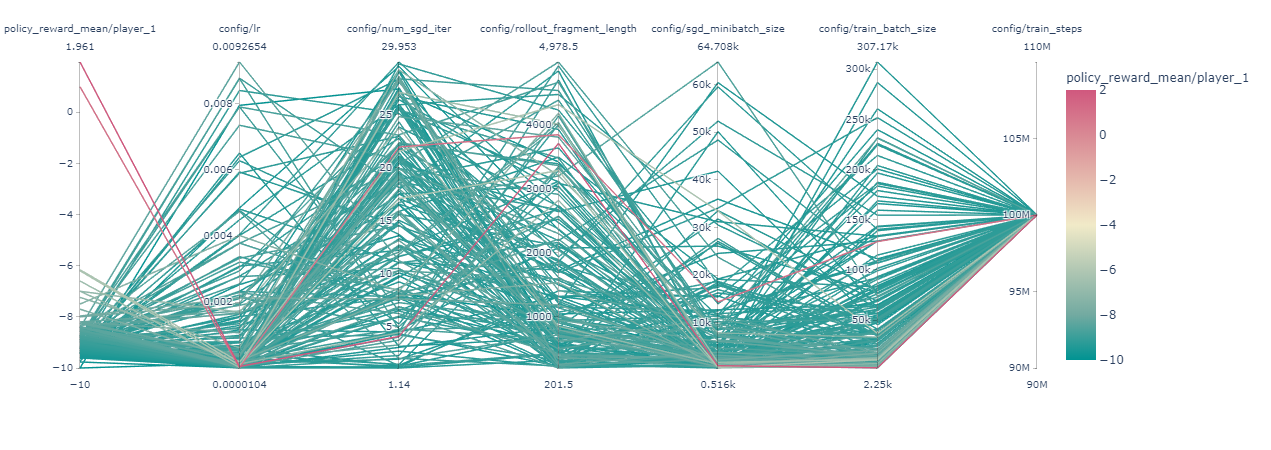

In [11]:
fig = px.parallel_coordinates(df, color=target,
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2, range_color=(-10, 2))
fig.show()

In [85]:
best_trial = df.iloc[0].logdir
df.iloc[0]

policy_reward_mean/player_1                                                 1.96078
config/lr                                                               5.71528e-05
config/num_sgd_iter                                                         4.11619
config/rollout_fragment_length                                              3708.18
config/sgd_minibatch_size                                                   1000.82
config/train_batch_size                                                     2464.11
config/train_policies                                                    [player_1]
config/train_steps                                                         99999999
logdir                            /home/sergei/ray_results/adversarial_tune/trai...
Name: 128, dtype: object

In [86]:
df

,policy_reward_mean/player_1,config/lr,config/num_sgd_iter,config/rollout_fragment_length,config/sgd_minibatch_size,config/train_batch_size,config/train_policies,config/train_steps,logdir
128,1.960784,0.000057,4.116194,3708.178910,1000.817647,2464.111373,[player_1],99999999,/home/sergei/ray_results/adversarial_tune/trai...
87,0.994652,0.000023,21.949864,3843.623786,14372.764910,128245.196000,[player_1],99999999,/home/sergei/ray_results/adversarial_tune/trai...
108,-6.160991,0.000190,21.549042,4312.161363,33443.826011,36722.945427,[player_1],99999999,/home/sergei/ray_results/adversarial_tune/trai...
140,-6.200000,0.000093,17.083069,3285.154137,668.193905,10423.787553,[player_1],99999999,/home/sergei/ray_results/adversarial_tune/trai...
21,-6.600000,0.000025,27.098123,4007.739857,1711.145451,10810.925513,[player_1],99999999,/home/sergei/ray_results/adversarial_tune/trai...
...,...,...,...,...,...,...,...,...,...
136,-9.640719,0.002532,13.611310,376.845811,2992.504913,26747.341069,[player_1],99999999,/home/sergei/ray_results/adversarial_tune/trai...
102,-9.736842,0.004852,29.540771,2361.071957,1617.207564,47118.328839,[player_1],99999999,/home/sergei/ray_results/adversarial_tune/trai...
130,-9.765625,0.000015,25.979604,218.498841,2167.383754,40750.982994,[player_1],99999999,/home/sergei/ray_results/adversarial_tune/trai...
19,-10.000000,0.000154,8.162845,995.519138,3478.474406,6683.783796,[player_1],99999999,/home/sergei/ray_results/adversarial_tune/trai...


1009


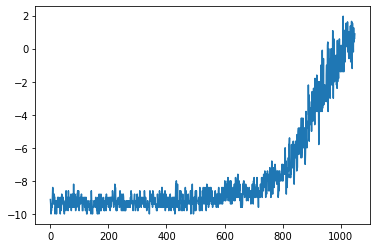

In [91]:
rew = analysis.trial_dataframes[best_trial][target]
plt.plot(rew)
print(np.argmax(rew))

In [88]:
best_trial

'/home/sergei/ray_results/adversarial_tune/train_one_281_lr=5.7153e-05,num_sgd_iter=4.1162,rollout_fragment_length=3708.2,sgd_minibatch_size=1000.8,train_batch_size=2464.1_2020-08-01_06-54-345ciy_top'